## Observations and Insights 

1. Additional to size reduction on the tumor, survival rate should be analized. As some hold the size of the tumor but many mice die
2. Best four treatment move consistenly within de standar deviation second and third quartiles not showing any outliers. IT might be too soon to have outliers
3. theres is high corellation between tumor size and mice wight implying that by tracking weith gain there could be a first approach of drug performance

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy import stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_df = pd.read_csv(mouse_metadata_path)
study_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df=pd.merge(mouse_df,study_df, how="outer", on="Mouse ID")
merge_df.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [2]:
# Checking the number of mice in the DataFrame.
entrycount=len(merge_df["Mouse ID"])
micecount=len(merge_df["Mouse ID"].unique())
print(f"""The number of Mouse in the joint table is {micecount} 
and the number of Mouse entries in the data set is {entrycount}""")

The number of Mouse in the joint table is 249 
and the number of Mouse entries in the data set is 1893


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicatemice=merge_df[merge_df.duplicated(["Mouse ID","Timepoint"])]
duplicatemice=duplicatemice.drop_duplicates(subset=["Mouse ID"],keep="last")
duplicatemice=pd.DataFrame(duplicatemice)
duplicatemice=duplicatemice.reset_index()
duplicatemice=duplicatemice["Mouse ID"]
print(f"The duplicated Mouse ID ind both Mouse ID and Timepoint is {duplicatemice}")


The duplicated Mouse ID ind both Mouse ID and Timepoint is 0    g989
Name: Mouse ID, dtype: object


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
Duplicatedmicedata=pd.merge(merge_df,duplicatemice, how="inner", on="Mouse ID")
Duplicatedmicedata


Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0      g989     Propriva  Female          21          26          0   
1      g989     Propriva  Female          21          26          0   
2      g989     Propriva  Female          21          26          5   
3      g989     Propriva  Female          21          26          5   
4      g989     Propriva  Female          21          26         10   
5      g989     Propriva  Female          21          26         10   
6      g989     Propriva  Female          21          26         15   
7      g989     Propriva  Female          21          26         15   
8      g989     Propriva  Female          21          26         20   
9      g989     Propriva  Female          21          26         20   
10     g989     Propriva  Female          21          26         25   
11     g989     Propriva  Female          21          26         30   
12     g989     Propriva  Female          21          26         35   

    Tumor Volume (mm3)  Metastatic Sites  
0            45.000000                 0  
1            45.000000                 0  
2            48.786801                 0  
3            47.570392                 0  
4            51.745156                 0  
5            49.880528                 0  
6            51.325852                 1  
7            53.442020                 0  
8            55.326122                 1  
9            54.657650                 1  
10           56.045564                 1  
11           59.082294                 1  
12           62.570880                 2

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=merge_df.drop_duplicates(subset=["Mouse ID"],keep="last")
clean_df

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
9        k403     Ramicane    Male          21          16         45   
19       s185    Capomulin  Female           3          17         45   
29       x401    Capomulin  Female          16          15         45   
39       m601    Capomulin    Male          22          17         45   
49       g791     Ramicane    Male          11          16         45   
...       ...          ...     ...         ...         ...        ...   
1859     z314     Stelasyn  Female          21          28          5   
1862     z435     Propriva  Female          12          26         10   
1872     z581    Infubinol  Female          24          25         45   
1882     z795     Naftisol  Female          13          29         45   
1892     z969     Naftisol    Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
9              22.050126                 1  
19             23.343598                 1  
29             28.484033                 0  
39             28.430964                 1  
49             29.128472                 1  
...                  ...               ...  
1859           45.934712                 0  
1862           48.710661                 0  
1872           62.754451                 3  
1882           65.741070                 3  
1892           73.867845                 4  

[249 rows x 8 columns]

In [6]:
# Checking the number of mice in the clean DataFrame.
micecountcdf=len(clean_df["Mouse ID"].unique())
print(f"The number of unique Mice in the clean DataFrame is {micecountcdf}")

The number of unique Mice in the clean DataFrame is 249


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

mean=clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median=clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var=clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std=clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem=clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
summarystats=pd.DataFrame({"Mean":mean,"Median":median,"Variance":var,"Std Deviation":std,"SEM":sem})
summarystats


Mean     Median    Variance  Std Deviation       SEM
Drug Regimen                                                           
Capomulin     36.667568  38.125164   32.663378       5.715188  1.143038
Ceftamin      57.753977  59.851956   69.982735       8.365568  1.673114
Infubinol     58.178246  60.165180   74.010875       8.602957  1.720591
Ketapril      62.806191  64.487812   98.921330       9.945920  1.989184
Naftisol      61.205757  63.283288  106.029927      10.297083  2.059417
Placebo       60.508414  62.030594   78.759797       8.874672  1.774934
Propriva      56.736964  55.841410   69.349002       8.327605  1.665521
Ramicane      36.191390  36.561652   32.166354       5.671539  1.134308
Stelasyn      61.001707  62.192350   90.331586       9.504293  1.940056
Zoniferol     59.181258  61.840058   76.862027       8.767099  1.753420

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
reg_mean=clean_df[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").mean()
reg_median=clean_df[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").median()
reg_var=clean_df[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").var()
reg_std=clean_df[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").std()
reg_sem=clean_df[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").sem()
merreg1 = pd.merge(reg_mean, reg_median, on="Drug Regimen",how="inner")
merreg2 = pd.merge(reg_var, reg_std, on="Drug Regimen",how="inner")
merreg3 = pd.merge(merreg1, merreg2, on="Drug Regimen",how="inner")
merreg4 = pd.merge(merreg3, reg_sem, on="Drug Regimen",how="inner")
merreg4=merreg4.rename(
columns={"Tumor Volume (mm3)_x_x":"Mean","Tumor Volume (mm3)_y_x":"Median","Tumor Volume (mm3)_x_y":"Variance","Tumor Volume (mm3)_y_y":"Std Deviation","Tumor Volume (mm3)":"SEM"})
merreg4


Mean     Median    Variance  Std Deviation       SEM
Drug Regimen                                                           
Capomulin     36.667568  38.125164   32.663378       5.715188  1.143038
Ceftamin      57.753977  59.851956   69.982735       8.365568  1.673114
Infubinol     58.178246  60.165180   74.010875       8.602957  1.720591
Ketapril      62.806191  64.487812   98.921330       9.945920  1.989184
Naftisol      61.205757  63.283288  106.029927      10.297083  2.059417
Placebo       60.508414  62.030594   78.759797       8.874672  1.774934
Propriva      56.736964  55.841410   69.349002       8.327605  1.665521
Ramicane      36.191390  36.561652   32.166354       5.671539  1.134308
Stelasyn      61.001707  62.192350   90.331586       9.504293  1.940056
Zoniferol     59.181258  61.840058   76.862027       8.767099  1.753420

## Bar Plots

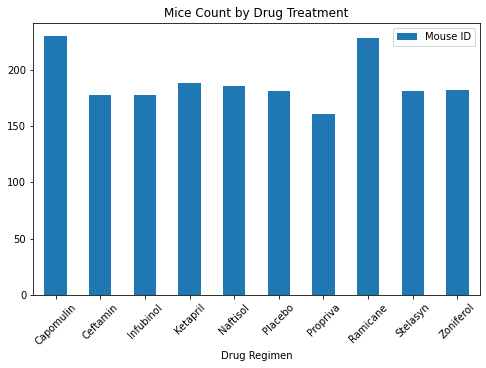

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
count_df=merge_df[["Drug Regimen","Mouse ID"]].groupby("Drug Regimen").count()
count_df.plot(kind="bar",figsize=(8,5), rot=45)
plt.title("Mice Count by Drug Treatment",loc="center")
plt.show()

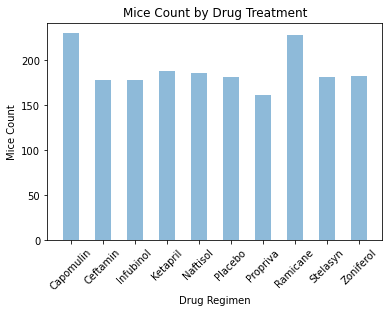

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
reg=count_df.reset_index()
reglist = reg["Drug Regimen"].tolist()
count2 = reg["Mouse ID"].tolist()
x_axis = np.arange(len(reg))
plt.bar(x_axis, count2,alpha=0.5,  align="center", width=0.5)
plt.xticks(x_axis,reglist,rotation="45")
plt.title("Mice Count by Drug Treatment",loc = "center")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Count")
plt.show()

## Pie Plots

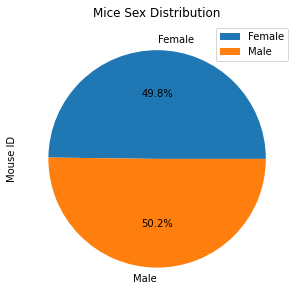

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#get data frame
sex_df=clean_df[["Mouse ID","Sex"]].groupby("Sex").count()
sex_df.plot(kind="pie",figsize=(5, 5),autopct="%1.1f%%",subplots=True)
plt.title("Mice Sex Distribution")
plt.show()


In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

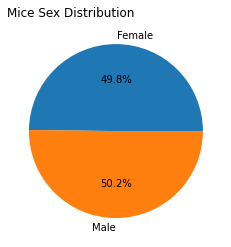

In [13]:
sex=sex_df.reset_index()
sexlist = sex["Sex"].tolist()
x_axis = sex["Mouse ID"].tolist()
plt.pie(x_axis, labels=sexlist, autopct='%1.1f%%')
plt.title("Mice Sex Distribution",loc = "left")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 


In [15]:
top_df={"Drug Regimen":["Capomulin","Ceftamin","Infubinol","Ramicane"]}
top_df=pd.DataFrame(top_df).reset_index()
top_df

index Drug Regimen
0      0    Capomulin
1      1     Ceftamin
2      2    Infubinol
3      3     Ramicane

In [16]:
#Find Mice with best drug regime
mergeresults=pd.merge(top_df,clean_df,on="Drug Regimen")
micebestreg_df=pd.DataFrame(mergeresults)

In [17]:
#Print Mice Last Tumor Volume
lastTvol=pd.DataFrame(micebestreg_df.drop(["Drug Regimen","Sex","Age_months","Weight (g)","Timepoint","Metastatic Sites"],axis=1))
lastTvol

index Mouse ID  Tumor Volume (mm3)
0       0     s185           23.343598
1       0     x401           28.484033
2       0     m601           28.430964
3       0     f966           30.485985
4       0     u364           31.023923
..    ...      ...                 ...
95      3     q597           45.220869
96      3     a444           43.047543
97      3     r921           43.419381
98      3     w678           43.166373
99      3     y449           44.183451

[100 rows x 3 columns]

In [39]:
# Determine if there are any potential outliers in final tumor Volume
quartiles = lastTvol["Tumor Volume (mm3)"].quantile([.25,.5,.75])

lowerq = quartiles[.25]
upperq = quartiles[.75]

iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f" Lower Bound {lower_bound}")
print(f" Upper Bound {upper_bound}")


 Lower Bound 3.0739668737499812
 Upper Bound 94.04403868375002


In [40]:
lastTvol["Tumor Volume (mm3)"].describe()

count    100.000000
mean      47.197795
std       12.953884
min       22.050126
25%       37.187744
50%       45.000000
75%       59.930262
max       72.226731
Name: Tumor Volume (mm3), dtype: float64

In [41]:
# Find possible outliers
outliers = lastTvol.loc[(lastTvol["Tumor Volume (mm3)"]<lower_bound) | (lastTvol["Tumor Volume (mm3)"]>upper_bound)]

In [42]:
outliers.describe()
#there is no outliers


index  Tumor Volume (mm3)
count    0.0                 0.0
mean     NaN                 NaN
std      NaN                 NaN
min      NaN                 NaN
25%      NaN                 NaN
50%      NaN                 NaN
75%      NaN                 NaN
max      NaN                 NaN

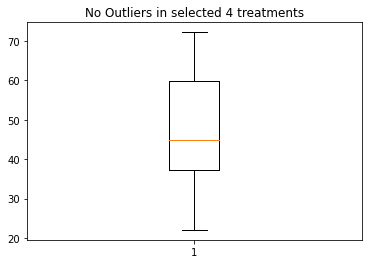

In [43]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(lastTvol["Tumor Volume (mm3)"])
plt.title("No Outliers in selected 4 treatments")
plt.show()


 Lower Bound 20.70456164999999
 Upper Bound 51.83201549


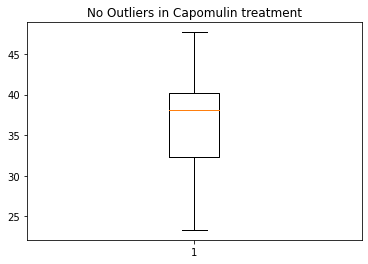

Capomulin last Tumor Volume Statistics Results


count    25.000000
mean     36.667568
std       5.715188
min      23.343598
25%      32.377357
50%      38.125164
75%      40.159220
max      47.685963
Name: Tumor Volume (mm3), dtype: float64

In [52]:
# now find it for each of the regimens. 
capo_df={"Drug Regimen":["Capomulin"]}
capo_df=pd.DataFrame(capo_df).reset_index()
capomerge=pd.merge(capo_df,clean_df,on="Drug Regimen")
capomerge=pd.DataFrame(capomerge)
lastcapo=pd.DataFrame(capomerge.drop(["Drug Regimen","Sex","Age_months","Weight (g)","Timepoint","Metastatic Sites"],axis=1))
quartiles = lastcapo["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f" Lower Bound {lower_bound}")
print(f" Upper Bound {upper_bound}")
plt.boxplot(lastcapo["Tumor Volume (mm3)"])
plt.title("No Outliers in Capomulin treatment")
plt.show()
print("Capomulin last Tumor Volume Statistics Results")
lastcapo["Tumor Volume (mm3)"].describe()

 Lower Bound 25.355449580000002
 Upper Bound 87.66645829999999


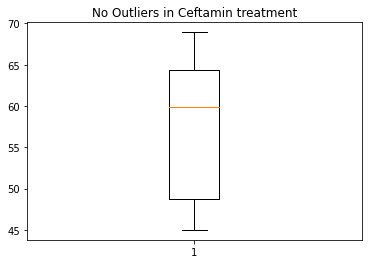

Ceftamin last Tumor Volume Statistics Results


count    25.000000
mean     57.753977
std       8.365568
min      45.000000
25%      48.722078
50%      59.851956
75%      64.299830
max      68.923185
Name: Tumor Volume (mm3), dtype: float64

In [50]:
ceft_df={"Drug Regimen":["Ceftamin"]}
ceft_df=pd.DataFrame(ceft_df).reset_index()
ceftmerge=pd.merge(ceft_df,clean_df,on="Drug Regimen")
ceftmerge=pd.DataFrame(ceftmerge)
lastceft=pd.DataFrame(ceftmerge.drop(["Drug Regimen","Sex","Age_months","Weight (g)","Timepoint","Metastatic Sites"],axis=1))
quartiles = lastceft["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f" Lower Bound {lower_bound}")
print(f" Upper Bound {upper_bound}")
plt.boxplot(lastceft["Tumor Volume (mm3)"])
plt.title("No Outliers in Ceftamin treatment")
plt.show()
print("Ceftamin last Tumor Volume Statistics Results")
lastceft["Tumor Volume (mm3)"].describe()

 Lower Bound 17.912664470000003
 Upper Bound 54.30681135


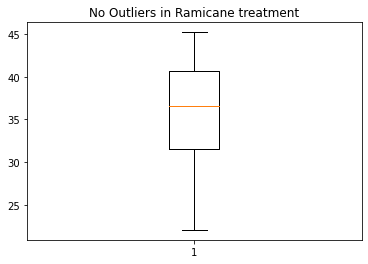

Ramicane last Tumor Volume Statistics Results


count    25.000000
mean     36.191390
std       5.671539
min      22.050126
25%      31.560470
50%      36.561652
75%      40.659006
max      45.220869
Name: Tumor Volume (mm3), dtype: float64

In [53]:
rami_df={"Drug Regimen":["Ramicane"]}
rami_df=pd.DataFrame(rami_df).reset_index()
ramimerge=pd.merge(rami_df,clean_df,on="Drug Regimen")
ramimerge=pd.DataFrame(ramimerge)
lastrami=pd.DataFrame(ramimerge.drop(["Drug Regimen","Sex","Age_months","Weight (g)","Timepoint","Metastatic Sites"],axis=1))
quartiles = lastrami["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f" Lower Bound {lower_bound}")
print(f" Upper Bound {upper_bound}")
plt.boxplot(lastrami["Tumor Volume (mm3)"])
plt.title("No Outliers in Ramicane treatment")
plt.show()
print("Ramicane last Tumor Volume Statistics Results")
lastrami["Tumor Volume (mm3)"].describe()


 Lower Bound 36.83290494999999
 Upper Bound 82.74144559000001


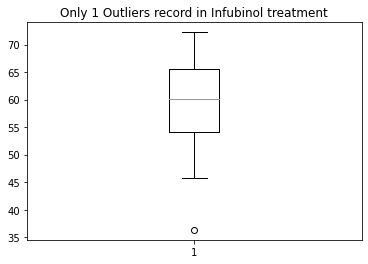

Infubinol last Tumor Volume Statistics Results - One Outlier at 36.3


count    25.000000
mean     58.178246
std       8.602957
min      36.321346
25%      54.048608
50%      60.165180
75%      65.525743
max      72.226731
Name: Tumor Volume (mm3), dtype: float64

In [57]:
infu_df={"Drug Regimen":["Infubinol"]}
infu_df=pd.DataFrame(infu_df).reset_index()
infumerge=pd.merge(infu_df,clean_df,on="Drug Regimen")
infumerge=pd.DataFrame(infumerge)
lastinfu=pd.DataFrame(infumerge.drop(["Drug Regimen","Sex","Age_months","Weight (g)","Timepoint","Metastatic Sites"],axis=1))
quartiles = lastinfu["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f" Lower Bound {lower_bound}")
print(f" Upper Bound {upper_bound}")
plt.boxplot(lastinfu["Tumor Volume (mm3)"])
plt.title("Only 1 Outliers record in Infubinol treatment")
plt.show()
print("Infubinol last Tumor Volume Statistics Results - One Outlier at 36.3")
lastinfu["Tumor Volume (mm3)"].describe()


## Line and Scatter Plots

In [24]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
drug_df=pd.DataFrame(merge_df)
drug_filter={
    "Drug Regimen":["Capomulin"]
}
drug2merge = pd.DataFrame(drug_filter,columns=["Drug Regimen"])
mergedrug=pd.merge(drug2merge,clean_df,on="Drug Regimen",how="outer")
mergedrug.head()

Drug Regimen Mouse ID     Sex  Age_months  Weight (g)  Timepoint  \
0    Capomulin     s185  Female           3          17         45   
1    Capomulin     x401  Female          16          15         45   
2    Capomulin     m601    Male          22          17         45   
3    Capomulin     f966    Male          16          17         20   
4    Capomulin     u364    Male          18          17         45   

   Tumor Volume (mm3)  Metastatic Sites  
0           23.343598                 1  
1           28.484033                 0  
2           28.430964                 1  
3           30.485985                 0  
4           31.023923                 3

In [25]:
#Data frame for Plotting
mouse_df=drug_df.loc[drug_df["Mouse ID"]=="s185"]
mouse_df

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
10     s185    Capomulin  Female           3          17          0   
11     s185    Capomulin  Female           3          17          5   
12     s185    Capomulin  Female           3          17         10   
13     s185    Capomulin  Female           3          17         15   
14     s185    Capomulin  Female           3          17         20   
15     s185    Capomulin  Female           3          17         25   
16     s185    Capomulin  Female           3          17         30   
17     s185    Capomulin  Female           3          17         35   
18     s185    Capomulin  Female           3          17         40   
19     s185    Capomulin  Female           3          17         45   

    Tumor Volume (mm3)  Metastatic Sites  
10           45.000000                 0  
11           43.878496                 0  
12           37.614948                 0  
13           38.177232                 0  
14           36.866876                 0  
15           33.949940                 0  
16           32.959671                 1  
17           28.328531                 1  
18           25.472143                 1  
19           23.343598                 1

In [26]:
x_values=mouse_df["Timepoint"]
y_values=mouse_df["Tumor Volume (mm3)"]
plt.plot(x_values,y_values)
plt.xlabel('Point in Time')
plt.ylabel('Tumor Volume in mm3')
plt.title("Tumor volume evolution for Mouse S185 on Capumlin Drug")
plt.show()

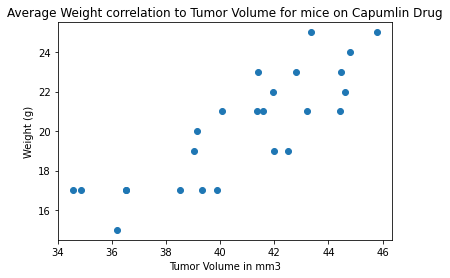

In [27]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin=drug_df.loc[drug_df["Drug Regimen"]=="Capomulin"]
capomulin=capomulin[["Mouse ID","Weight (g)","Tumor Volume (mm3)"]].groupby("Mouse ID").mean()
y_values=capomulin["Weight (g)"]
x_values=capomulin["Tumor Volume (mm3)"]
plt.scatter(x_values,y_values)
plt.ylabel('Weight (g)')
plt.xlabel('Tumor Volume in mm3')
plt.title("Average Weight correlation to Tumor Volume for mice on Capumlin Drug")
plt.show()


## Correlation and Regression

In [28]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [29]:
(slope,intercept,rvalue,pvale,stderr)=stats.linregress(x_values,y_values)
print(slope,intercept,rvalue,pvale,stderr)
# Get regression values
regress_values=x_values*slope+intercept

0.7426941826944178 -10.148863164111322 0.8419363424694718 1.3225722434712642e-07 0.09924763572688564


In [30]:
# Create line equation string
line_eq="y="+str(round(slope,2))+'x+'+str(round(intercept,2))
print(f"The linear regression model for the correlation between Tumor volume and Mouse wight on Mice under Capomulin is [ {line_eq} ] ")

The linear regression model for the correlation between Tumor volume and Mouse wight on Mice under Capomulin is [ y=0.74x+-10.15 ] 


In [31]:
#find R Squared
#Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r')

# Label plot and annotate the line equation
plt.xlabel('Tumor Volume mm3')
plt.ylabel('Weight Grams')
plt.annotate(line_eq,(20,15),fontsize=15,color='red')

# Print r square value
print(f'r squared or Correlation value is: {rvalue**2} showing a Strong Correlation')

# Show plot
plt.show()

r squared or Correlation value is: 0.7088568047708717 showing a Strong Correlation
